In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5
# import pytz module for working with time zone
import pytz, os

# Load env variables
%load_ext dotenv
%dotenv

from stockstats import StockDataFrame

# display data on the MetaTrader 5 package
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)

MetaTrader5 package author:  MetaQuotes Ltd.
MetaTrader5 package version:  5.0.37


In [2]:
# establish connection to the MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
# display data on MetaTrader 5 version
print(mt5.version())

(500, 3391, '05 Aug 2022')


In [3]:
# MT5 account infor
MT5_ACCOUNT = os.environ.get('MT5_ACCOUNT')
MT5_PASSWORD = os.environ.get('MT5_PASSWORD')
MT5_SERVER = os.environ.get('MT5_SERVER')

In [4]:
# now connect to another trading account specifying the password
authorized=mt5.login(login=MT5_ACCOUNT, password=MT5_PASSWORD, server=MT5_SERVER)
if authorized:
    # display trading account data 'as is'
    print(mt5.account_info())
    # display trading account data in the form of a list
    print("Show account_info()._asdict():")
    account_info_dict = mt5.account_info()._asdict()
    for prop in account_info_dict:
        print("  {}={}".format(prop, account_info_dict[prop]))
else:
    print("failed to connect at account #{}, error code: {}".format(MT5_ACCOUNT, mt5.last_error()))
 


AccountInfo(login=6106603, trade_mode=0, leverage=100, limit_orders=0, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=100000.0, credit=0.0, profit=0.0, equity=100000.0, margin=0.0, margin_free=100000.0, margin_level=0.0, margin_so_call=100.0, margin_so_so=50.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Dan Da', server='OANDA-OGM MT5 Demo', currency='USD', company='OANDA Corporation')
Show account_info()._asdict():
  login=6106603
  trade_mode=0
  leverage=100
  limit_orders=0
  margin_so_mode=0
  trade_allowed=True
  trade_expert=True
  margin_mode=2
  currency_digits=2
  fifo_close=False
  balance=100000.0
  credit=0.0
  profit=0.0
  equity=100000.0
  margin=0.0
  margin_free=100000.0
  margin_level=0.0
  margin_so_call=100.0
  margin_so_so=50.0
  margin_initial=0.0
  margin_maintenance=0.0
  assets=0.0
  liabilities=0.0
  commission_blocked=0.0
  name=Dan

In [5]:
datetime(2022,8,4)

datetime.datetime(2022, 8, 4, 0, 0)

In [9]:
eurusd_rates = mt5.copy_rates_range("EURUSD", mt5.TIMEFRAME_H1, datetime(2022,8,4,20), datetime(2022,8,5,1))
eurusd_rates

array([(1659668400, 1.02468, 1.02478, 1.0231 , 1.02317, 3726, 10, 0),
       (1659672000, 1.02317, 1.02382, 1.0229 , 1.02325, 4079, 10, 0),
       (1659675600, 1.02325, 1.0236 , 1.0229 , 1.02336, 2733, 10, 0),
       (1659679200, 1.02336, 1.02392, 1.02328, 1.02359, 1976, 10, 0),
       (1659682800, 1.02359, 1.02387, 1.02331, 1.02345, 1950, 10, 0),
       (1659686400, 1.02345, 1.02364, 1.0227 , 1.02309, 3027, 10, 0)],
      dtype=[('time', '<i8'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('tick_volume', '<u8'), ('spread', '<i4'), ('real_volume', '<u8')])

In [11]:
ticks_frame = pd.DataFrame(eurusd_rates)
ticks_frame['time'] = pd.to_datetime(ticks_frame['time'], unit='s')
ticks_frame

,time,open,high,low,close,tick_volume,spread,real_volume
0,2022-08-05 03:00:00,1.02468,1.02478,1.02310,1.02317,3726,10,0
1,2022-08-05 04:00:00,1.02317,1.02382,1.02290,1.02325,4079,10,0
2,2022-08-05 05:00:00,1.02325,1.02360,1.02290,1.02336,2733,10,0
3,2022-08-05 06:00:00,1.02336,1.02392,1.02328,1.02359,1976,10,0
4,2022-08-05 07:00:00,1.02359,1.02387,1.02331,1.02345,1950,10,0
5,2022-08-05 08:00:00,1.02345,1.02364,1.02270,1.02309,3027,10,0


In [12]:
stock_df = StockDataFrame.retype(ticks_frame)
stock_df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2022-08-05 03:00:00,1.02468,1.02478,1.02310,1.02317,3726,10,0
1,2022-08-05 04:00:00,1.02317,1.02382,1.02290,1.02325,4079,10,0
2,2022-08-05 05:00:00,1.02325,1.02360,1.02290,1.02336,2733,10,0
3,2022-08-05 06:00:00,1.02336,1.02392,1.02328,1.02359,1976,10,0
4,2022-08-05 07:00:00,1.02359,1.02387,1.02331,1.02345,1950,10,0
5,2022-08-05 08:00:00,1.02345,1.02364,1.02270,1.02309,3027,10,0


In [13]:
stock_df[["time", "change", "rate", "close_-1_d", "log-ret"]]

,time,change,rate,close_-1_d,log-ret
0,2022-08-05 03:00:00,0.000000,NaN,0.00000,0.000000
1,2022-08-05 04:00:00,0.007819,0.007819,0.00008,0.000078
2,2022-08-05 05:00:00,0.010750,0.010750,0.00011,0.000107
3,2022-08-05 06:00:00,0.022475,0.022475,0.00023,0.000225
4,2022-08-05 07:00:00,-0.013677,-0.013677,-0.00014,-0.000137
5,2022-08-05 08:00:00,-0.035175,-0.035175,-0.00036,-0.000352


In [15]:
stock_df[["time", "close", "close_14_sma", "close_50_sma", "close_200_sma" ]]

,time,close,close_14_sma,close_50_sma,close_200_sma
0,2022-08-05 03:00:00,1.02317,1.023170,1.023170,1.023170
1,2022-08-05 04:00:00,1.02325,1.023210,1.023210,1.023210
2,2022-08-05 05:00:00,1.02336,1.023260,1.023260,1.023260
3,2022-08-05 06:00:00,1.02359,1.023343,1.023343,1.023343
4,2022-08-05 07:00:00,1.02345,1.023364,1.023364,1.023364
5,2022-08-05 08:00:00,1.02309,1.023318,1.023318,1.023318


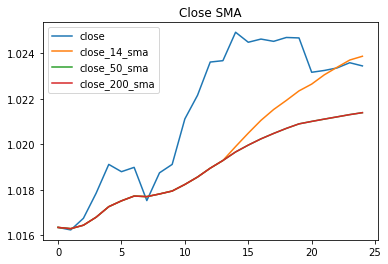

In [28]:
stock_df[["close", "close_14_sma", "close_50_sma", "close_200_sma" ]].plot(title="Close SMA");

In [31]:
stock_df[["tick_volume", "tick_volume_14_sma", "tick_volume_xu_tick_volume_14_sma" ]]

,tick_volume,tick_volume_14_sma,tick_volume_xu_tick_volume_14_sma
0,2311,2311.000000,False
1,4049,3180.000000,True
2,7573,4644.333333,False
3,8795,5682.000000,False
4,7204,5986.400000,False
5,5896,5971.333333,False
6,5504,5904.571429,False
7,14846,7022.250000,True
8,13554,7748.000000,False
9,13055,8278.700000,False


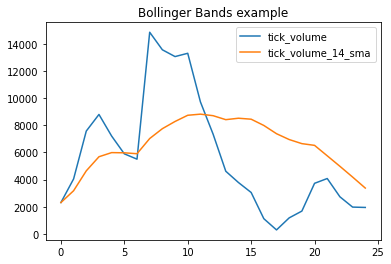

In [26]:
stock_df[["tick_volume", "tick_volume_14_sma", ]].plot(title="Bollinger Bands example");